# 1. 라이브러리 불러오기

In [1]:
import platform
import re

import pandas as pd
import numpy as np
pd.set_option('max.columns', 100)

import warnings
warnings.filterwarnings(action = 'ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import folium
plt.style.use('ggplot')
%matplotlib inline

if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    plt.rcParams['font.family'] = 'AppleGothic'

# 2. 데이터 불러오기

In [2]:
편의시설 = pd.read_csv('./data/장애인스포츠강좌이용권시설인근편의시설정보.csv', encoding = 'CP949')

print('Shape Of Data :', 편의시설.shape, '\n')
print('-' * 50)

편의시설.info()

Shape Of Data : (391035, 22) 

--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391035 entries, 0 to 391034
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   체육시설시도코드     391035 non-null  int64  
 1   체육시설시도명      391035 non-null  object 
 2   체육시설군구코드     391035 non-null  int64  
 3   체육시설시군구명     391035 non-null  object 
 4   체육시설명        391035 non-null  object 
 5   체육시설대표자전화번호  376783 non-null  float64
 6   체육시설우편번호     391035 non-null  int64  
 7   체육시설주소       391035 non-null  object 
 8   체육시설상세주소     387968 non-null  object 
 9   체육시설주요종목코드   391035 non-null  int64  
 10  체육시설주요종목명    391035 non-null  object 
 11  체육시설경도       391035 non-null  float64
 12  체육시설위도       391035 non-null  float64
 13  편의시설ID       391035 non-null  int64  
 14  편의시설설립일자     233513 non-null  float64
 15  편의시설명        391035 non-null  object 
 16  편의시설경도       391035 non-null

In [3]:
# 필요한 변수만 추출하여 저장
편의시설 = 편의시설[['체육시설시도코드', '체육시설시도명', '체육시설시군구명', '체육시설명', '체육시설경도', '체육시설위도', '편의시설ID', '편의시설명', 
                 '편의시설유형코드', '편의시설경도', '편의시설위도', '편의시설유형명', '체육편의시설거리']]

display(편의시설.head())

,체육시설시도코드,체육시설시도명,체육시설시군구명,체육시설명,체육시설경도,체육시설위도,편의시설ID,편의시설명,편의시설유형코드,편의시설경도,편의시설위도,편의시설유형명,체육편의시설거리
0,11,서울,서대문구,매직짐,126.942992,37.591589,681,천연동주민센터,UC0A03,126.959068,37.571113,지역자치센터,2.682
1,11,서울,강서구,박사 경희대 태권도,126.847853,37.540887,18726,현대홈타운,UC0U04,126.834523,37.528751,다세대주택,1.790
2,11,서울,강서구,박사 경희대 태권도,126.847853,37.540887,77609,내츄럴2차,UC0U01,126.832856,37.551746,아파트,1.791
3,11,서울,강서구,박사 경희대 태권도,126.847853,37.540887,72434,경도오피스텔,UC0K02,126.850790,37.524945,금융업소 등 일반업무시설,1.791
4,11,서울,강서구,박사 경희대 태권도,126.847853,37.540887,136030,수팰리스,UC0U04,126.868165,37.541235,다세대주택,1.791


In [5]:
# '편의시설유형명' 확인
print(편의시설['편의시설유형명'].unique())

['지역자치센터' '다세대주택' '아파트' '금융업소 등 일반업무시설' '수퍼마켓·일용품 등의 소매점' '일반숙박시설(호텔, 여관)'
 '교육원·직업훈련소·학원 등' '의원·치과의원·한의원·조산소(산후조리원)' '우체국' '어린이집'
 '병원·치과병원·한방병원·정신병원·요양병원' '일반음식점' '고등학교' '중학교' '유치원' '노인복지시설(경로당포함)'
 '초등학교' '종교집회장' '이용원·미용원·목욕장' '종합병원' '아파트 부대복리시설' '집회장' '운동장' '파출소, 지구대'
 '국가 또는 지자체 청사' '도매·소매시장·상점' '아동복지시설' '공장' '공중화장실' '방송국' '공연장' '주차장'
 '이외 사회복지시설' '관광숙박시설(관광호텔, 콘도등)' '장애인복지시설' '국민건강보험공단 및 지사' '전문대학'
 '생활권수련시설' '연립주택' '대학교' '전시장' '자연공원' '특수학교' '기숙사' '휴게음식점·제과점' '대피소' '체육관'
 '전신전화국' '도서관' '도시공원' '공공도서관' '지역아동센터' '보건소' '장례식장(의료시설의 부수시설제외)'
 '근로복지공단 및 지사' '국민연금공단 및 지사' '야외음악당·야외극장·어린이회관' '관람장' '동·식물원' '자연권수련시설'
 '한국장애인고용공단 및 지사' '안마시술소' '운전학원' '휴게소' '격리병원' '교도소·구치소' '화장시설'
 '봉안당(종교시설에 해당하는 것은 제외)']


In [6]:
# 필요하다고 생각되는 편의시설 추출
편의시설_list = ['의원·치과의원·한의원·조산소(산후조리원)', '병원·치과병원·한방병원·정신병원·요양병원', '주차장', '종합병원', 
               '파출소, 지구대', '공중화장실', '도시공원', '이외 사회복지시설', '장애인복지시설', '아동복지시설', '자연공원', '보건소']

print('변경 전 Shape Of Data :', 편의시설.shape, '\n')

# 편의시설 추출
편의시설 = 편의시설[편의시설['편의시설유형명'].isin(편의시설_list)]

print('변경 후 Shape Of Data :', 편의시설.shape, '\n')
display(편의시설.head(3))

변경 전 Shape Of Data : (391035, 13) 

변경 후 Shape Of Data : (41464, 13) 



,체육시설시도코드,체육시설시도명,체육시설시군구명,체육시설명,체육시설경도,체육시설위도,편의시설ID,편의시설명,편의시설유형코드,편의시설경도,편의시설위도,편의시설유형명,체육편의시설거리
18,11,서울,강서구,박사 경희대 태권도,126.847853,37.540887,2212,햇살가득한가정의학과의원,UC0A14,126.863554,37.530511,의원·치과의원·한의원·조산소(산후조리원),1.802
28,11,서울,강서구,박사 경희대 태권도,126.847853,37.540887,6102,새빛요양병원(윤빌딩),UC0F02,126.851627,37.557069,병원·치과병원·한방병원·정신병원·요양병원,1.830
100,11,서울,강서구,박사 경희대 태권도,126.847853,37.540887,6043,홍익병원본관,UC0F01,126.863639,37.528482,종합병원,1.960


In [7]:
# '편의시설유형명' 변수의 값들을 변경
편의시설.loc[편의시설['편의시설유형명'] == '의원·치과의원·한의원·조산소(산후조리원)', '편의시설유형명'] = '의원'
편의시설.loc[편의시설['편의시설유형명'] == '병원·치과병원·한방병원·정신병원·요양병원', '편의시설유형명'] = '병원'
편의시설.loc[편의시설['편의시설유형명'] == '파출소, 지구대', '편의시설유형명'] = '지구대'

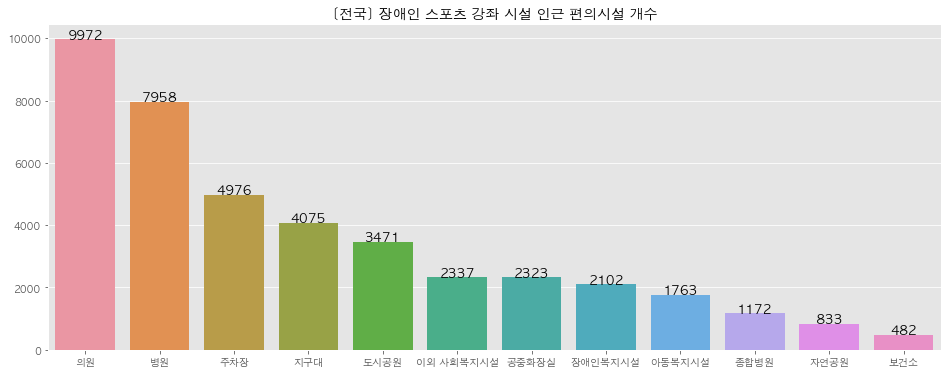

In [9]:
# 전국 편의시설 개수 시각화
plt.figure(figsize = (16, 6))
plot_data = pd.DataFrame(편의시설['편의시설유형명'].value_counts())

sns.barplot(x = plot_data.index, y = '편의시설유형명', data = plot_data)
plt.title('[전국] 장애인 스포츠 강좌 시설 인근 편의시설 개수', fontsize = 14)
plt.xlabel('')
plt.ylabel('')

for index, [value] in enumerate(plot_data.values):
    plt.text(index, value, value, ha = 'center', fontsize = 13)

In [10]:
# '경기도' 지역의 '구리시장애인종합복지관'에 대해서만 살펴보도록 하자.
경기_data = 편의시설[편의시설['체육시설시도명'] == '경기']

# '구리시장애인종합복지관' 데이터 추출
data = 경기_data[경기_data['체육시설명'] == '구리시장애인종합복지관'].reset_index(drop = True)

In [11]:
경기_map = folium.Map(location = [36.40886055894505, 127.63462243700751], zoom_start = 7)
folium.Marker([37.591558, 127.141082], popup = '구리시장애인종합복지관').add_to(경기_map)

for index in data.index:
    편의시설위도 = data.loc[index, '편의시설위도']
    편의시설경도 = data.loc[index, '편의시설경도']
    popup = data.loc[index, '편의시설유형명']
    거리 = data.loc[index, '체육편의시설거리']
    
    if 거리 <= 1:
        folium.Marker([편의시설위도, 편의시설경도], icon = folium.Icon(color = 'green'), popup = popup).add_to(경기_map)

In [12]:
경기_map